In [22]:
import scipy as sc
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from pydataset import data
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

<h2> Ordinary Least Squares </h2>
<a>https://www.youtube.com/watch?v=b0L47BeklTE</a>

<AxesSubplot:xlabel='skin', ylabel='bmi'>

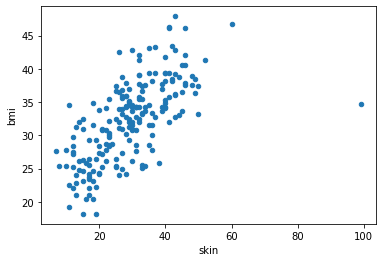

In [2]:
#reg = linear_model.LinearRegression()
pima = data('Pima.tr')

pima.plot(kind='scatter', x='skin', y='bmi')

In [3]:
# Test train split supervised learning
X_train, X_test, y_train, y_test = train_test_split(pima.skin, pima.bmi)

Text(0.5, 1.0, 'Test Train Split')

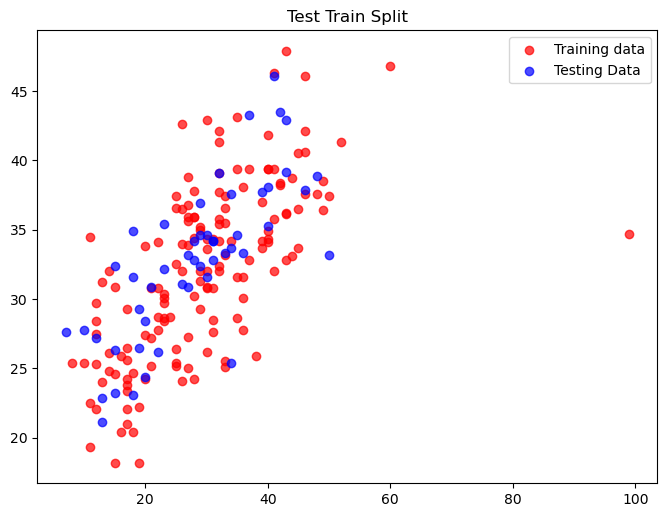

In [4]:
plt.figure(figsize=(8, 6), dpi=100)
plt.scatter(X_train, y_train, label="Training data", color='r', alpha=.7)
plt.scatter(X_test, y_test, label="Testing Data", color='b', alpha=0.7)
plt.legend()
plt.title("Test Train Split")

In [5]:
#Create Linear Training Model
LR = linear_model.LinearRegression()
LR.fit(X_train.values.reshape(-1, 1), y_train.values) 

LinearRegression()

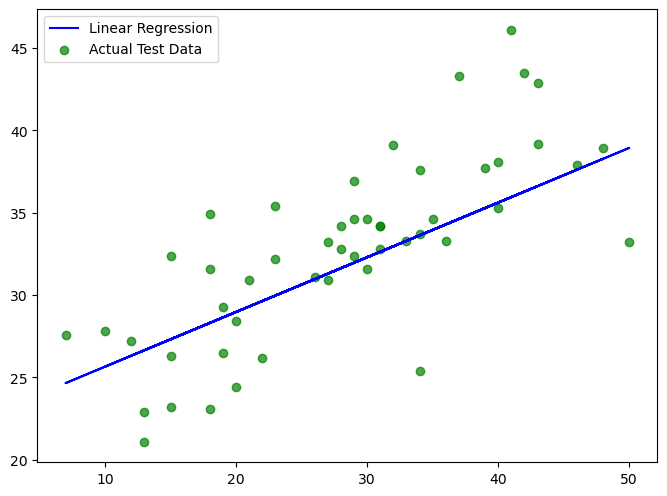

In [6]:
#Use model to predict on TEST data
prediction = LR.predict(X_test.values.reshape(-1, 1))


#Plot against actual test data
plt.figure(figsize=(8, 6), dpi=100)
plt.plot(X_test, prediction, label="Linear Regression", color='b')
plt.scatter(X_test, y_test, label="Actual Test Data", color='g', alpha=0.7)
plt.legend()

In [7]:
#Score
LR.score(X_test.values.reshape(-1, 1), y_test.values)

0.5185866381989058

<h2> Elastic Net Regression</h2>
<p> Lasso Regression is best for using many uncorrelated/useless variables  </p> 

<p> Ridge Regression will use ALL of the variables (best when all of them are necessary) but will shrink the parameters. Elastic-Net starts with OLS (Residual Sum of Squares RSS) +  L1 Lasso Regression Penalty + L2 Ridge Regression Penalty  </p> 

This is a form of penalized or regularized regression; where penalties are added to the loss function as to reduce the coefficient values of the regression equation.

In [8]:
from sklearn import datasets

boston_dataset = datasets.load_boston()


/home/gugu/mambaforge/envs/bioinfo/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the Californ

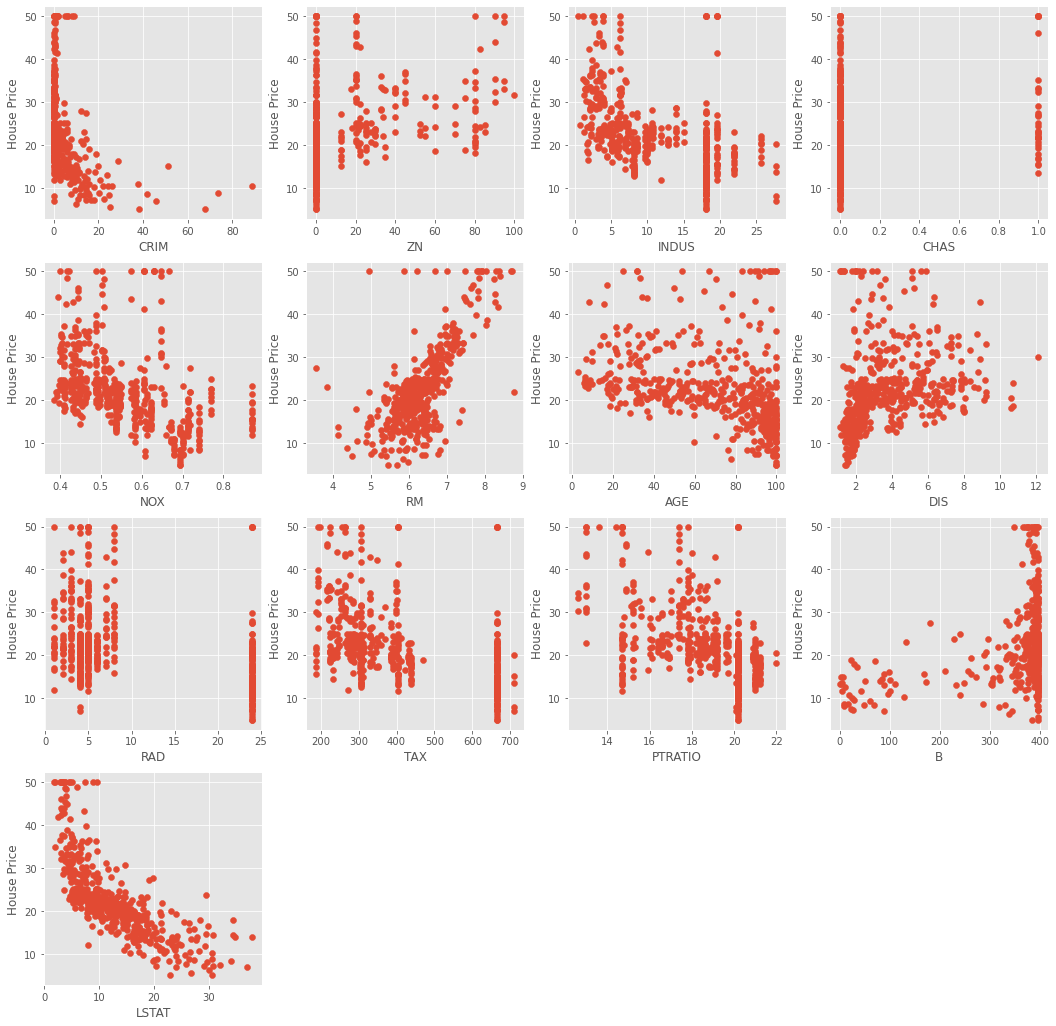

In [9]:
plt.style.use('ggplot')

fig = plt.figure(figsize = (18, 18))
 
for index, feature_name in enumerate(boston_dataset.feature_names):
    ax = fig.add_subplot(4, 4, index + 1)
    ax.scatter(boston_dataset.data[:, index], boston_dataset.target)
    ax.set_ylabel('House Price', size = 12)
    ax.set_xlabel(feature_name, size = 12)
 
plt.show()

In [10]:
#Load Boston into Pandas
boston_pd = pd.DataFrame(boston_dataset.data)
boston_pd.columns = boston_dataset.feature_names
#print(boston_dataset.target)
boston_pd_target = np.asarray(boston_dataset.target)
#Set Target Variable, 13 independent + 1 dependent
boston_pd['House Price'] = pd.Series(boston_pd_target)

#Remove Housing Price:
# input independent variables
X = boston_pd.iloc[:, :-1]
 
#output
Y = boston_pd.iloc[:, -1]

print(boston_pd.head(1))




      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE   DIS  RAD    TAX  PTRATIO  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.09  1.0  296.0     15.3   

       B  LSTAT  House Price  
0  396.9   4.98         24.0  


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25)
 
print("Train data shape of X = % s and Y = % s : "%(X_train.shape, y_train.shape))
 
print("Test data shape of X = % s and Y = % s : "%(X_test.shape, y_test.shape))

Train data shape of X = (379, 13) and Y = (379,) : 
Test data shape of X = (127, 13) and Y = (127,) : 


In [12]:
#Import Model
from sklearn.linear_model import ElasticNet

e_net = ElasticNet(alpha = 0.5)
e_net.fit(X_train, y_train)

#Calculate Predicton and Mean SE
y_pred_elastic = e_net.predict(X_test)
mean_squared_error = np.mean((y_pred_elastic - y_test) ** 2)

print("Mean Squared Error on test set", mean_squared_error)
 
e_net_coeff = pd.DataFrame()
e_net_coeff["Columns"] = X_train.columns
e_net_coeff['Coefficient Estimate'] = pd.Series(e_net.coef_)
e_net_coeff


Mean Squared Error on test set 21.077364060193393


,Columns,Coefficient Estimate
0,CRIM,-0.065816
1,ZN,0.066217
2,INDUS,0.000000
3,CHAS,0.000000
4,NOX,-0.000000
5,RM,1.681546
6,AGE,0.015938
7,DIS,-1.006452
8,RAD,0.296033
9,TAX,-0.015117


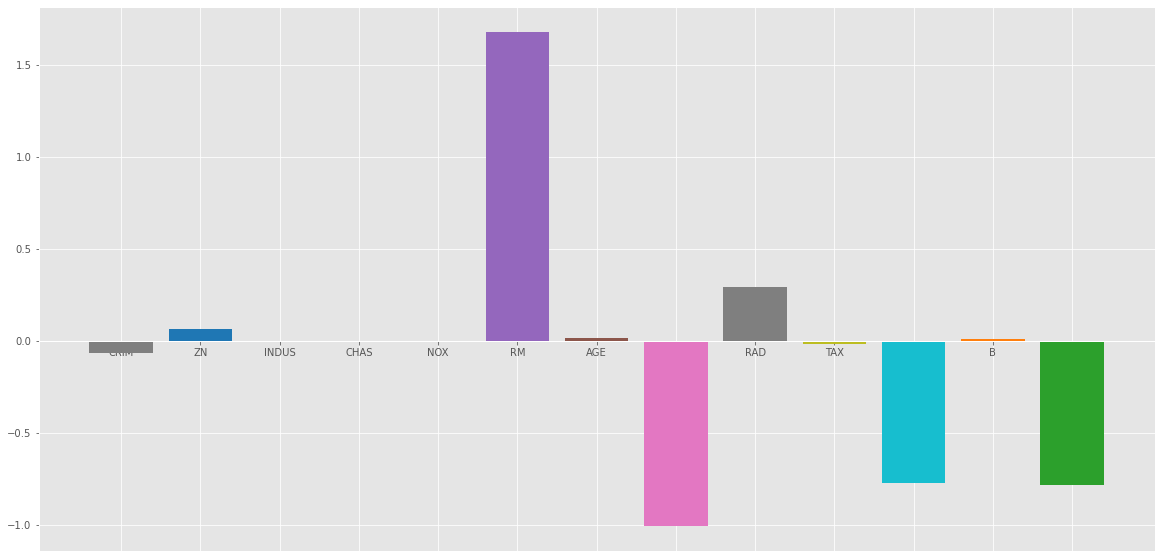

In [13]:
# plotting the coefficient score
fig, ax = plt.subplots(figsize =(20, 10))
 
color =['tab:gray', 'tab:blue', 'tab:orange',
'tab:green', 'tab:red', 'tab:purple', 'tab:brown',
'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan',
'tab:orange', 'tab:green', 'tab:blue', 'tab:olive']
 
ax.bar(e_net_coeff["Columns"], e_net_coeff['Coefficient Estimate'], color = color)
 
ax.spines['bottom'].set_position('zero')
 
plt.style.use('ggplot')
plt.show()

<h2> Decision Trees Regression </h2>

<p> A simple, non-parametric model that can be used for regression and classification. It can be thought of as a piecewise constant approximation. Using depth levels, one can approximate the data to a certain degree. Is prone to overfitting and susceptible to variations in data. </p>

<p> Using the Sum of Squared Residuals (SSR), one can create a binary tree. For a select number of observations, choose the minimum SSR. 

In [14]:
from sklearn.tree import DecisionTreeRegressor 

#Fit Decision Tree Regressor to the dataset, using Boston housing data again.
pd.set_option('display.max_columns', 20)


#print(boston_pd.head())

feature_names = ['B', 'NOX', 'AGE', 'CRIM']
target_name = 'House Price'

data_train, target_train = boston_pd[feature_names[0]], boston_pd[target_name]

data_test = pd.DataFrame(np.arange(data_train[feature_names].min(), data_train[feature_names].max()), columns=[feature_names])
#data_test = pd.DataFrame(data_train)
print(data_test)


KeyError: "None of [Index(['B', 'NOX', 'AGE', 'CRIM'], dtype='object')] are in the [index]"

Text(0.5, 1.0, 'Illustration of the regression dataset used')

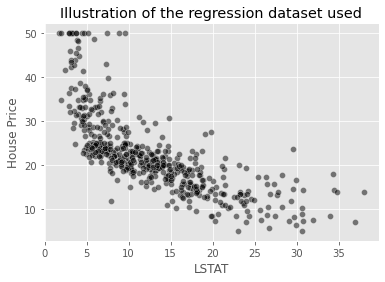

In [23]:
import seaborn as sns

sns.scatterplot(data=boston_pd, x=feature_name, y=target_name, color="black", alpha=0.5)
plt.title("Illustration of the regression dataset used")

In [ ]:
#Regression function
d_reg = DecisionTreeRegressor(max_depth =2)  
dt_np = data_train.to_numpy()
d_reg.fit(dt_np, target_train)

target_predicted = d_reg.predict(data_test)


ValueError: Expected 2D array, got 1D array instead:
array=[3.9690e+02 3.9690e+02 3.9283e+02 3.9463e+02 3.9690e+02 3.9412e+02
 3.9560e+02 3.9690e+02 3.8663e+02 3.8671e+02 3.9252e+02 3.9690e+02
 3.9050e+02 3.9690e+02 3.8002e+02 3.9562e+02 3.8685e+02 3.8675e+02
 2.8899e+02 3.9095e+02 3.7657e+02 3.9253e+02 3.9690e+02 3.9454e+02
 3.9433e+02 3.0342e+02 3.7688e+02 3.0638e+02 3.8794e+02 3.8023e+02
 3.6017e+02 3.7673e+02 2.3260e+02 3.5877e+02 2.4831e+02 3.9690e+02
 3.7756e+02 3.9690e+02 3.9343e+02 3.9563e+02 3.9562e+02 3.8541e+02
 3.8337e+02 3.9446e+02 3.8939e+02 3.9690e+02 3.9690e+02 3.9274e+02
 3.9690e+02 3.9690e+02 3.9556e+02 3.9397e+02 3.9690e+02 3.9690e+02
 3.9690e+02 3.9593e+02 3.9690e+02 3.9290e+02 3.9068e+02 3.9690e+02
 3.9511e+02 3.7808e+02 3.9690e+02 3.9558e+02 3.9324e+02 3.9690e+02
 3.9690e+02 3.9621e+02 3.9690e+02 3.9690e+02 3.8373e+02 3.7694e+02
 3.9091e+02 3.7717e+02 3.9492e+02 3.8323e+02 3.7366e+02 3.8696e+02
 3.8640e+02 3.9606e+02 3.9690e+02 3.9563e+02 3.9690e+02 3.9064e+02
 3.9690e+02 3.9230e+02 3.9599e+02 3.9515e+02 3.9690e+02 3.9606e+02
 3.9218e+02 3.9355e+02 3.9501e+02 3.9633e+02 3.9690e+02 3.5798e+02
 3.9183e+02 3.9690e+02 3.9353e+02 3.9690e+02 3.9476e+02 3.9558e+02
 7.0800e+01 3.9447e+02 3.9269e+02 3.9405e+02 3.9567e+02 3.8769e+02
 3.9524e+02 3.9123e+02 3.9349e+02 3.9559e+02 3.9495e+02 3.9690e+02
 3.8874e+02 3.4491e+02 3.9330e+02 3.9451e+02 3.3863e+02 3.9150e+02
 3.8915e+02 3.7767e+02 3.7809e+02 3.7031e+02 3.7938e+02 3.8502e+02
 3.5929e+02 3.9211e+02 3.9690e+02 3.9690e+02 3.9504e+02 3.9690e+02
 3.8576e+02 3.8869e+02 2.6276e+02 3.9467e+02 3.7825e+02 3.9408e+02
 3.9204e+02 3.9690e+02 3.8808e+02 3.9690e+02 3.9690e+02 3.9690e+02
 3.9690e+02 1.7291e+02 1.6927e+02 3.9171e+02 3.5699e+02 3.5185e+02
 3.7280e+02 3.4160e+02 3.4328e+02 2.6195e+02 3.2102e+02 8.8010e+01
 8.8630e+01 3.6343e+02 3.5389e+02 3.6431e+02 3.3892e+02 3.7443e+02
 3.8961e+02 3.8845e+02 3.9511e+02 2.4016e+02 3.6930e+02 2.2761e+02
 2.9709e+02 3.3004e+02 2.9229e+02 3.4813e+02 3.9690e+02 3.9550e+02
 3.9323e+02 3.9096e+02 3.9323e+02 3.9560e+02 3.9127e+02 3.9690e+02
 3.9556e+02 3.9690e+02 3.9412e+02 3.9690e+02 3.9100e+02 3.8711e+02
 3.9263e+02 3.9387e+02 3.8284e+02 3.9690e+02 3.7768e+02 3.8971e+02
 3.9049e+02 3.9337e+02 3.7670e+02 3.9423e+02 3.9690e+02 3.5431e+02
 3.9220e+02 3.9690e+02 3.8430e+02 3.9377e+02 3.9538e+02 3.9278e+02
 3.9055e+02 3.9690e+02 3.9487e+02 3.8943e+02 3.8132e+02 3.9690e+02
 3.9325e+02 3.9524e+02 3.9094e+02 3.8581e+02 3.4893e+02 3.9363e+02
 3.9280e+02 3.9278e+02 3.9690e+02 3.9374e+02 3.9170e+02 3.9524e+02
 3.9039e+02 3.9690e+02 3.8505e+02 3.8200e+02 3.8738e+02 3.7208e+02
 3.7751e+02 3.8034e+02 3.7835e+02 3.7614e+02 3.8591e+02 3.7895e+02
 3.6020e+02 3.7675e+02 3.8845e+02 3.9007e+02 3.7941e+02 3.8378e+02
 3.9125e+02 3.9462e+02 3.7275e+02 3.7471e+02 3.7249e+02 3.8913e+02
 3.9018e+02 3.7614e+02 3.7471e+02 3.9374e+02 3.9628e+02 3.7707e+02
 3.8609e+02 3.9690e+02 3.9289e+02 3.9518e+02 3.8634e+02 3.8970e+02
 3.8329e+02 3.9193e+02 3.9280e+02 3.8837e+02 3.8686e+02 3.9342e+02
 3.8789e+02 3.9240e+02 3.8407e+02 3.8454e+02 3.9030e+02 3.9134e+02
 3.8865e+02 3.9690e+02 3.9496e+02 3.9077e+02 3.9690e+02 3.9690e+02
 3.8925e+02 3.9345e+02 3.9690e+02 3.9690e+02 3.8731e+02 3.9223e+02
 3.7707e+02 3.9552e+02 3.9472e+02 3.9472e+02 3.4160e+02 3.9690e+02
 3.9690e+02 3.7172e+02 3.9690e+02 3.9690e+02 3.9690e+02 3.9690e+02
 3.9690e+02 3.9690e+02 3.9285e+02 3.9690e+02 3.6824e+02 3.7158e+02
 3.9086e+02 3.9575e+02 3.8361e+02 3.9043e+02 3.9368e+02 3.9336e+02
 3.9690e+02 3.9690e+02 3.9690e+02 3.9624e+02 3.5045e+02 3.9690e+02
 3.9630e+02 3.9339e+02 3.9569e+02 3.9642e+02 3.9070e+02 3.9690e+02
 3.9521e+02 3.9623e+02 3.9690e+02 3.9690e+02 3.9690e+02 3.9113e+02
 3.9690e+02 3.9368e+02 3.9690e+02 3.9690e+02 3.8244e+02 3.7521e+02
 3.6857e+02 3.9402e+02 3.6225e+02 3.8971e+02 3.8940e+02 3.9690e+02
 3.9690e+02 3.9481e+02 3.9614e+02 3.9690e+02 3.9690e+02 3.9474e+02
 3.8996e+02 3.9690e+02 3.8797e+02 3.8564e+02 3.6461e+02 3.9243e+02
 3.9094e+02 3.8985e+02 3.9690e+02 3.7078e+02 3.9233e+02 3.8446e+02
 3.8280e+02 3.7604e+02 3.7773e+02 3.9134e+02 3.9543e+02 3.9074e+02
 3.7456e+02 3.5065e+02 3.8079e+02 3.5304e+02 3.5455e+02 3.5470e+02
 3.1603e+02 1.3142e+02 3.7552e+02 3.7533e+02 3.9205e+02 3.6615e+02
 3.4788e+02 3.9690e+02 3.9690e+02 3.9690e+02 3.6302e+02 3.9690e+02
 3.9690e+02 3.9374e+02 3.9690e+02 3.9690e+02 3.9690e+02 3.9690e+02
 2.8583e+02 3.9690e+02 3.9690e+02 3.9690e+02 3.7292e+02 3.9690e+02
 3.9443e+02 3.7838e+02 3.9690e+02 3.9690e+02 3.9690e+02 3.9198e+02
 3.9690e+02 3.9310e+02 3.9690e+02 3.3816e+02 3.9690e+02 3.9690e+02
 3.7611e+02 3.9690e+02 3.2946e+02 3.8497e+02 3.7022e+02 3.3209e+02
 3.1464e+02 1.7936e+02 2.6000e+00 3.5050e+01 2.8790e+01 2.1097e+02
 8.8270e+01 2.7250e+01 2.1570e+01 1.2736e+02 1.6450e+01 4.8450e+01
 3.1875e+02 3.1998e+02 2.9155e+02 2.5200e+00 3.6500e+00 7.6800e+00
 2.4650e+01 1.8820e+01 9.6730e+01 6.0720e+01 8.3450e+01 8.1330e+01
 9.7950e+01 1.0019e+02 1.0063e+02 1.0985e+02 2.7490e+01 9.3200e+00
 6.8950e+01 3.9690e+02 3.9145e+02 3.8596e+02 3.9569e+02 3.8673e+02
 2.4052e+02 4.3060e+01 3.1801e+02 3.8852e+02 3.9690e+02 3.0421e+02
 3.2000e-01 3.5529e+02 3.8509e+02 3.7587e+02 6.6800e+00 5.0920e+01
 1.0480e+01 3.5000e+00 2.7221e+02 3.9690e+02 2.5523e+02 3.9143e+02
 3.9690e+02 3.9382e+02 3.9690e+02 3.3440e+02 2.2010e+01 3.3129e+02
 3.6874e+02 3.9690e+02 3.9690e+02 3.9533e+02 3.9337e+02 3.7468e+02
 3.5258e+02 3.0276e+02 3.9621e+02 3.4948e+02 3.7970e+02 3.8332e+02
 3.9690e+02 3.9307e+02 3.9528e+02 3.9292e+02 3.7073e+02 3.8862e+02
 3.9268e+02 3.8822e+02 3.9509e+02 3.4405e+02 3.1843e+02 3.9011e+02
 3.9690e+02 3.9690e+02 3.9690e+02 3.9329e+02 3.9690e+02 3.9690e+02
 3.9690e+02 3.9577e+02 3.9690e+02 3.9199e+02 3.9690e+02 3.9690e+02
 3.9345e+02 3.9690e+02].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

Text(0.5, 1.0, 'Prediction function using a DecisionTreeRegressor')

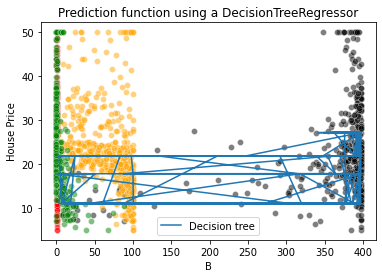

In [ ]:
sns.scatterplot(data=boston_pd, x=feature_names[0], y=target_name, color="black", alpha=0.5)
sns.scatterplot(data=boston_pd, x=feature_names[1], y=target_name, color="red", alpha=0.5)
sns.scatterplot(data=boston_pd, x=feature_names[2], y=target_name, color="orange", alpha=0.5)
sns.scatterplot(data=boston_pd, x=feature_names[3], y=target_name, color="green", alpha=0.5)

plt.plot(data_test[feature_names[0]], target_predicted, label="Decision tree")

plt.legend()
plt.title("Prediction function using a DecisionTreeRegressor")


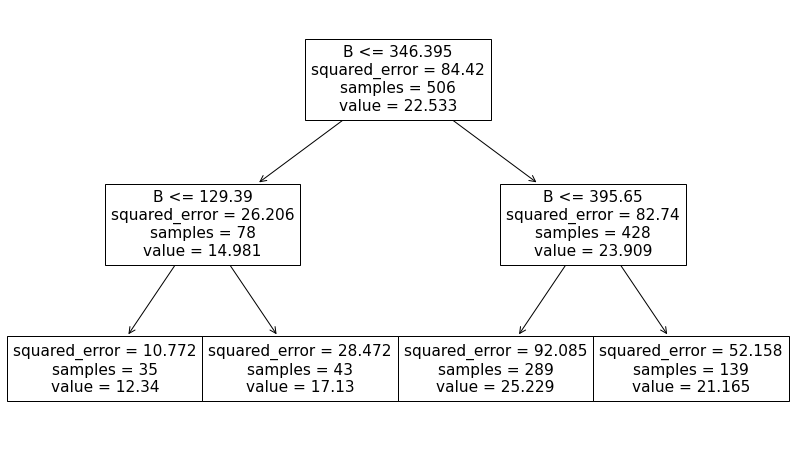

In [ ]:
from sklearn.tree import plot_tree

_, ax = plt.subplots(figsize=(14, 8))
_ = plot_tree(d_reg, feature_names=feature_name, ax=ax)

#https://www.cambridgespark.com/info/from-simple-regression-to-multiple-regression-with-decision-trees
#https://inria.github.io/scikit-learn-mooc/python_scripts/trees_regression.html

<h2> Neural Network Regression </h2>

<p> Multi-Layer Perceptron for regression</p> 

In [15]:
#
#
from sklearn.neural_network import MLPClassifier, MLPRegressor

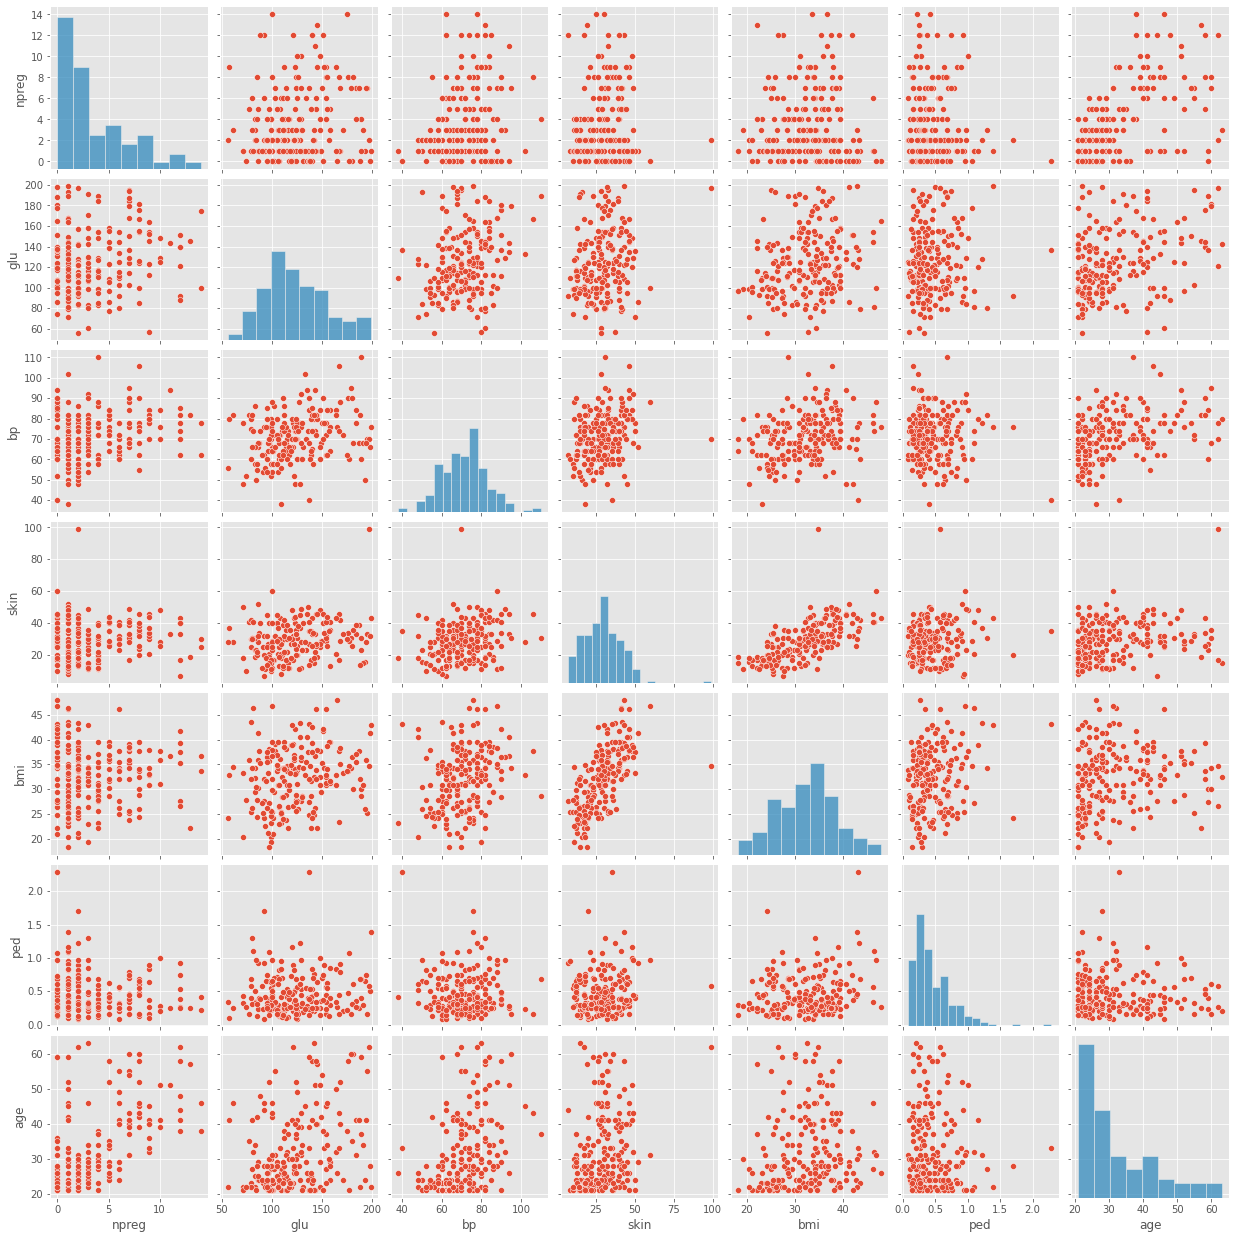

In [24]:
pima.head()
sns.pairplot(pima)

In [54]:
features = ['glu', 'bp', 'npreg', 'skin']

X = pima[features]
Y = pima['bmi']

print(X.describe().transpose())
print(" \n \n \nBMI:\n", Y)

X_train, X_test, Y_train, Y_test = train_test_split(X.values, Y.values, test_size=0.30, random_state = 40)
print(X_train.shape); print(X_test.shape)


       count     mean        std   min     25%    50%    75%    max
glu    200.0  123.970  31.667225  56.0  100.00  120.5  144.0  199.0
bp     200.0   71.260  11.479604  38.0   64.00   70.0   78.0  110.0
npreg  200.0    3.570   3.366268   0.0    1.00    2.0    6.0   14.0
skin   200.0   29.215  11.724594   7.0   20.75   29.0   36.0   99.0
 
 
 
BMI:
 1      30.2
2      25.1
3      35.8
4      47.9
5      26.4
       ... 
196    25.4
197    38.5
198    39.4
199    33.3
200    34.0
Name: bmi, Length: 200, dtype: float64
(140, 4)
(60, 4)


In [55]:
nn = MLPRegressor(max_iter=1000, activation='relu', hidden_layer_sizes= (8,8,8))

In [39]:
#MLPRegressor?

In [41]:
nn.fit(X_train, Y_train)
nn_pred = nn.predict(X_test)
score = nn.score(X_test, Y_test)
#print(nn_pred)
print(score)


-0.10410852698863526


In [21]:
Y_train

99     30.4
124    38.1
120    37.9
54     38.1
34     31.2
180    39.4
182    37.4
107    34.2
200    34.0
139    18.2
117    34.2
68     30.9
79     22.9
43     27.5
18     36.6
6      35.6
128    25.2
106    37.7
49     33.3
67     35.4
55     34.2
85     35.9
184    39.4
159    25.9
167    42.1
114    28.7
13     30.1
118    30.9
94     25.2
121    22.5
155    28.6
91     32.0
82     31.3
123    41.8
192    38.7
14     27.6
83     27.6
133    26.2
188    33.6
46     33.8
100    37.6
37     25.4
162    37.8
187    36.6
154    32.0
104    34.2
196    25.4
198    39.4
149    33.2
174    37.0
76     46.1
22     32.0
92     39.4
153    41.3
3      35.8
71     39.4
86     28.7
151    35.3
7      34.3
113    39.1
1      30.2
156    38.2
78     21.1
66     31.6
56     34.5
168    33.9
89     30.8
131    36.4
47     34.1
63     35.9
75     35.0
93     35.2
148    34.6
161    28.4
144    27.2
88     23.8
181    26.1
146    46.1
165    36.2
11     43.1
33     34.3
84     31.1
183    30.8
101 

In [ ]:
pred = np.array(nn_pred)


TypeError: 'tuple' object is not callable